##### Import nécessaires

In [36]:
# Ensure required modules are installed
%pip install nbformat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, butter, filtfilt, iirnotch
from io import StringIO
from nbformat import read
import sys
import io
from unittest.mock import patch
from IPython.display import display
import scipy.stats as stats
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


##### On charge les fichiers et on récupère les variables que l'on veut

In [33]:
# List of .ipynb files to process
notebook_files = ['1Amar.ipynb', '2Amar.ipynb', '3Amar.ipynb', '4Amar.ipynb', '5Amar.ipynb', '1Nmar.ipynb', '2Nmar.ipynb', '3Nmar.ipynb', '4Nmar.ipynb', '5Nmar.ipynb']

# Dictionary to store results for each file
results = {}

for file_name in notebook_files:
    try:
        # Load the .ipynb file
        with open(file_name, 'r', encoding='utf-8') as f:
            notebook = read(f, as_version=4)
        print(f"Notebook {file_name} imported successfully.")
    except FileNotFoundError:
        print(f"Error: The file '{file_name}' was not found. Please ensure it exists in the current directory.")
        continue

    # Dictionnaire pour stocker les variables
    global_vars = {}

    # Sauvegarde stdout et stderr pour masquer l'affichage
    stdout_backup = sys.stdout
    stderr_backup = sys.stderr
    sys.stdout = io.StringIO()  # Capture la sortie standard
    sys.stderr = io.StringIO()  # Capture les erreurs

    # Désactiver l'affichage interactif de Matplotlib
    plt.ioff()

    # Redéfinir `plt.show()` et `display()` pour bloquer les affichages
    with patch("matplotlib.pyplot.show"), patch("IPython.display.display"):
        # Exécuter toutes les cellules de code sans affichage
        for cell in notebook.cells:
            if cell.cell_type == "code":
                exec(cell.source, global_vars)

    # Rétablir la sortie normale
    sys.stdout = stdout_backup
    sys.stderr = stderr_backup
    plt.ion()  # Réactiver l'affichage interactif
    plt.close("all")  # Fermer toutes les figures en mémoire

    # Récupérer uniquement `average_cycle_time`
    average_cycle_time = global_vars.get("average_cycle_time", "Variable non trouvée")
    results["ATC_"+file_name] = average_cycle_time

Notebook 1Amar.ipynb imported successfully.
Notebook 2Amar.ipynb imported successfully.
Notebook 3Amar.ipynb imported successfully.
Notebook 4Amar.ipynb imported successfully.
Notebook 5Amar.ipynb imported successfully.
Notebook 1Nmar.ipynb imported successfully.
Notebook 2Nmar.ipynb imported successfully.
Notebook 3Nmar.ipynb imported successfully.
Notebook 4Nmar.ipynb imported successfully.
Notebook 5Nmar.ipynb imported successfully.


##### On affiche tous les temps de cycle moyen

In [34]:
# Print results for all files
for file_name, average_cycle_time in results.items():
    print(f"{file_name}: {average_cycle_time}")


ATC_1Amar.ipynb: 1.5264285714285715
ATC_2Amar.ipynb: 1.1375000000000002
ATC_3Amar.ipynb: 1.3225625
ATC_4Amar.ipynb: 1.425
ATC_5Amar.ipynb: 1.3023030303030305
ATC_1Nmar.ipynb: 1.262
ATC_2Nmar.ipynb: 1.315
ATC_3Nmar.ipynb: 1.3208
ATC_4Nmar.ipynb: 1.48
ATC_5Nmar.ipynb: 1.3206666666666667


##### Analyse statistique sur le temps de cycle moyen

In [ ]:
#On crée nos 2 groupes de données ATC_A et ATC_N
ATC_N=[]
ATC_A=[]

for file_name, average_cycle_time in results.items():
    if file_name.startswith('ATC_1Amar') or file_name.startswith('ATC_2Amar') or file_name.startswith('ATC_3Amar') or file_name.startswith('ATC_4Amar') or file_name.startswith('ATC_5Amar'):
        ATC_A.append(average_cycle_time)
    else:
        ATC_N.append(average_cycle_time)

print("ATC_A:", ATC_A)
print("ATC_N:", ATC_N)

ATC_A: [1.5264285714285715, 1.1375000000000002, 1.3225625, 1.425, 1.3023030303030305]
ATC_N: [1.262, 1.315, 1.3208, 1.48, 1.3206666666666667]


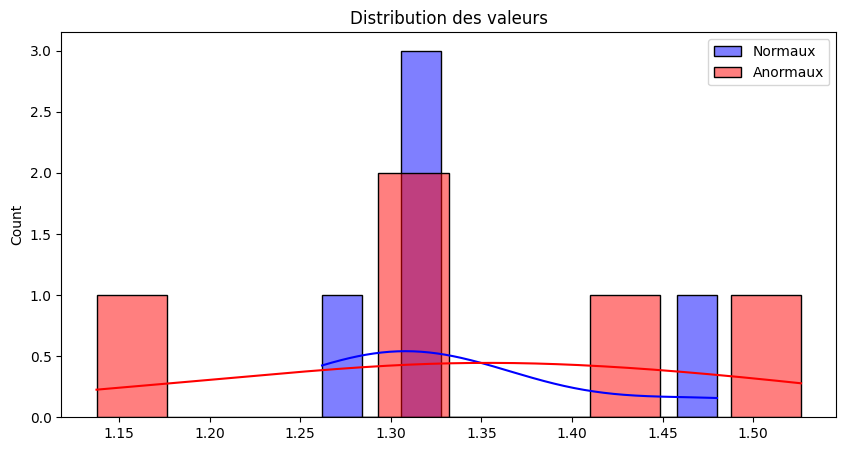

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(ATC_N, label="Normaux", color="blue", kde=True, bins=10)
sns.histplot(ATC_A, label="Anormaux", color="red", kde=True, bins=10)
plt.legend()
plt.title("Distribution des valeurs")
plt.show()

In [41]:
# Test de normalité de Shapiro-Wilk
_, p_n = stats.shapiro(ATC_N)
_, p_a = stats.shapiro(ATC_A)

print(f"P-valeur normalité (Normaux) : {p_n:.4f}")
print(f"P-valeur normalité (Anormaux) : {p_a:.4f}")

if p_n > 0.05 and p_a > 0.05:
    print("Les deux groupes suivent une loi normale.")

P-valeur normalité (Normaux) : 0.0685
P-valeur normalité (Anormaux) : 0.9364
Les deux groupes suivent une loi normale.


In [ ]:
# Test de Mann-Whitney
stat, p_value = stats.mannwhitneyu(ATC_N, ATC_A, alternative='two-sided')

print(f"Statistique U : {stat:.4f}")
print(f"P-valeur Mann-Whitney : {p_value:.4f}")

alpha = 0.05  # Seuil de signification
if p_value < alpha:
    print("Différence significative entre les deux groupes")
else:
    print("Aucune différence significative entre les groupes")

Statistique U : 11.0000
P-valeur Mann-Whitney : 0.8413
Aucune différence significative entre les groupes (ne rejette pas H0)
